In [1]:
# Import pandas as a alias 'pd'
import pandas as pd

# Load the CSV files "marathon_results_2017.csv" under "data" folder
marathon_results_2017 = pd.read_csv("./data/marathon_results_2017.csv")

#Drop unnecessary columns
marathon_2017 = marathon_results_2017.drop(['Unnamed: 0','Bib', 'Name', 'Age', 'City', 'State', 'Country', 'Citizen', 'Unnamed: 9', 'Half', 'Pace', 'Proj Time', 'Official Time', 'Overall', 'Gender', 'Division'], axis='columns')

# Import Numpy Library and call it as np
import numpy as np

In [2]:
# Convert using pandas to_timedelta method
marathon_2017['5K'] = pd.to_timedelta(marathon_2017['5K'])
marathon_2017['10K'] = pd.to_timedelta(marathon_2017['10K'])
marathon_2017['15K'] = pd.to_timedelta(marathon_2017['15K'])
marathon_2017['20K'] = pd.to_timedelta(marathon_2017['20K'])
marathon_2017['25K'] = pd.to_timedelta(marathon_2017['25K'])
marathon_2017['30K'] = pd.to_timedelta(marathon_2017['30K'])
marathon_2017['35K'] = pd.to_timedelta(marathon_2017['35K'])
marathon_2017['40K'] = pd.to_timedelta(marathon_2017['40K'])

In [3]:
# Convert time to seconds value using astype method
marathon_2017['5K'] = marathon_2017['5K'].astype('m8[s]').astype(np.int64)
marathon_2017['10K'] = marathon_2017['10K'].astype('m8[s]').astype(np.int64)
marathon_2017['15K'] = marathon_2017['15K'].astype('m8[s]').astype(np.int64)
marathon_2017['20K'] = marathon_2017['20K'].astype('m8[s]').astype(np.int64)
marathon_2017['25K'] = marathon_2017['25K'].astype('m8[s]').astype(np.int64)
marathon_2017['30K'] = marathon_2017['30K'].astype('m8[s]').astype(np.int64)
marathon_2017['35K'] = marathon_2017['35K'].astype('m8[s]').astype(np.int64)
marathon_2017['40K'] = marathon_2017['40K'].astype('m8[s]').astype(np.int64)

In [4]:
# Define function name to_seconds
check_time = 7200
Lat = 0
Long = 0
Location = ''
points = [[42.247835,-71.474357], [42.274032,-71.423979], [42.282364,-71.364801], [42.297870,-71.284260],
          [42.324830,-71.259660], [42.345680,-71.215169], [42.352089,-71.124947], [42.351510,-71.086980]]

In [5]:
marathon_location = pd.DataFrame(columns=['Lat','Long'])
for index, record in marathon_2017.iterrows():
    if (record['40K'] < check_time):
        Lat = points[7][0]
        Long = points[7][1]
    elif (record['35K'] < check_time):
        Lat = points[6][0]
        Long = points[6][1]
    elif (record['30K'] < check_time):
        Lat = points[5][0]
        Long = points[5][1]
    elif (record['25K'] < check_time):
        Lat = points[4][0]
        Long = points[4][1]
    elif (record['20K'] < check_time):
        Lat = points[3][0]
        Long = points[3][1]
    elif (record['15K'] < check_time):
        Lat = points[2][0]
        Long = points[2][1]
    elif (record['10K'] < check_time):
        Lat = points[1][0]
        Long = points[1][1]
    elif (record['5K'] < check_time):
        Lat = points[0][0]
        Long = points[0][1]
    else:
        Lat = points[0][0]
        Long = points[0][1]
    marathon_location = marathon_location.append({'Lat' : Lat,
                                        'Long' : Long},
                                        ignore_index=True)

In [6]:
marathon_count = marathon_location.groupby(['Lat', 'Long']).size().reset_index(name='Count')

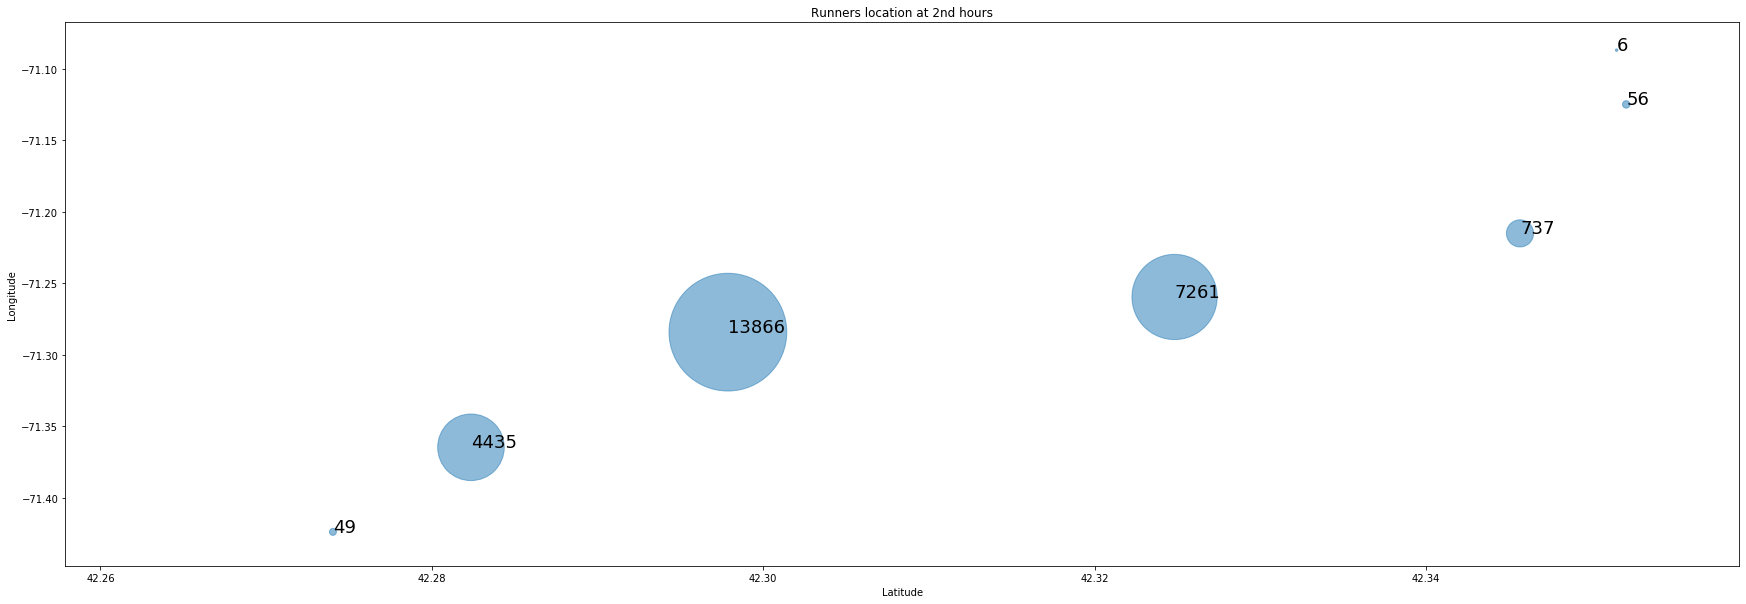

In [9]:
# Import pyplot as a alias 'plt'
import matplotlib.pyplot as plt

# Configure figure size
plt.figure(figsize=(30,10))
plt.scatter(marathon_count.Lat, marathon_count.Long, s=marathon_count.Count, alpha=0.5)

for i, txt in enumerate(marathon_count.Count):
    plt.annotate(txt, (marathon_count.Lat[i], marathon_count.Long[i]), fontsize=18)

# Add a title
plt.title("Runners location at 2nd hours")
# Add x-axis label
plt.xlabel("Latitude")
# Add y-axis label
plt.ylabel("Longitude")

plt.show()